**Name : Ritabrato Pani**

**Roll no. : 22050395**

**Topic : Logistic Regression**

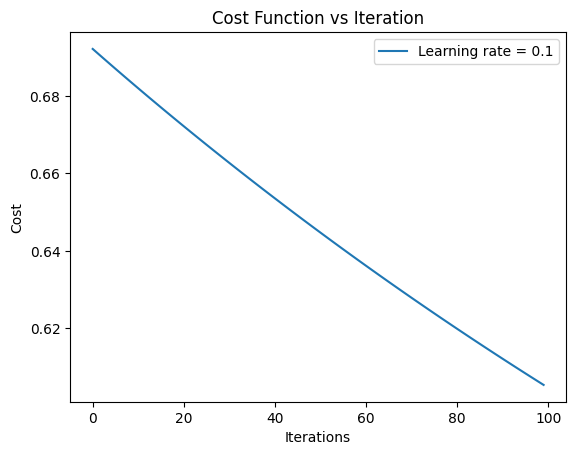

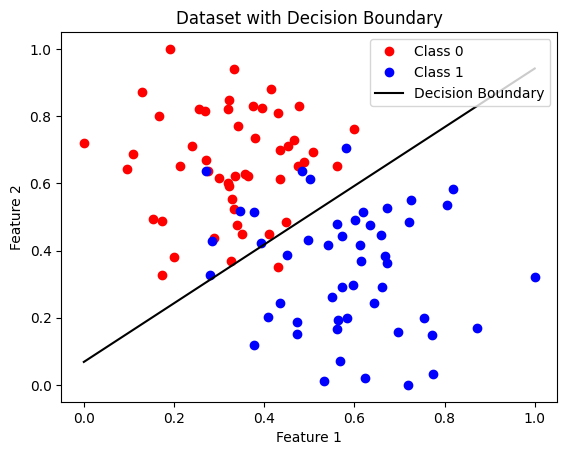

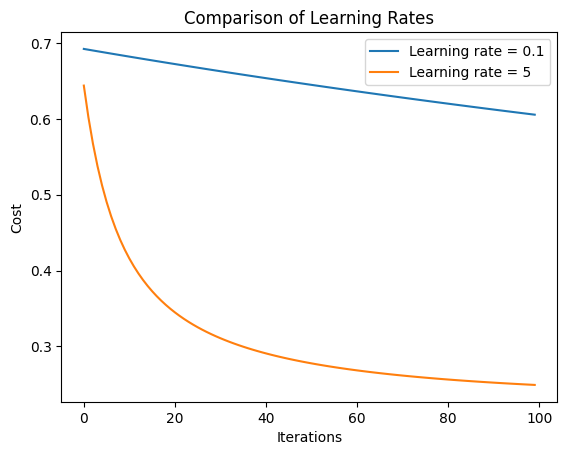

Confusion Matrix:
TP: 41, FP: 1, FN: 9, TN: 49
Accuracy: 0.90
Precision: 0.98
Recall: 0.82
F1-Score: 0.89


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv("logisticX.csv", header=None).values
y = pd.read_csv("logisticY.csv", header=None).values

X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X = (X - X_min) / (X_max - X_min)

X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost.flatten()[0]
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * X.T @ (h - y)
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

learning_rate = 0.1
iterations = 100
theta = np.zeros((X.shape[1], 1))

theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

plt.plot(range(len(cost_history)), cost_history, label="Learning rate = 0.1")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iteration")
plt.legend()
plt.show()

x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(X[y.flatten() == 0, 1], X[y.flatten() == 0, 2], "ro", label="Class 0")
plt.plot(X[y.flatten() == 1, 1], X[y.flatten() == 1, 2], "bo", label="Class 1")
plt.plot(x_values, y_values, "k-", label="Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset with Decision Boundary")
plt.legend()
plt.show()

theta1 = np.zeros((X.shape[1], 1))
theta2 = np.zeros((X.shape[1], 1))
_, cost_history_1 = gradient_descent(X, y, theta1, 0.1, 100)
_, cost_history_2 = gradient_descent(X, y, theta2, 5, 100)

plt.plot(range(len(cost_history_1)), cost_history_1, label="Learning rate = 0.1")
plt.plot(range(len(cost_history_2)), cost_history_2, label="Learning rate = 5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Comparison of Learning Rates")
plt.legend()
plt.show()

def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

y_pred = predict(X, theta)

tp = np.sum((y_pred == 1) & (y == 1))
tn = np.sum((y_pred == 0) & (y == 0))
fp = np.sum((y_pred == 1) & (y == 0))
fn = np.sum((y_pred == 0) & (y == 1))

accuracy = (tp + tn) / len(y)
precision = tp / (tp + fp) if tp + fp != 0 else 0
recall = tp / (tp + fn) if tp + fn != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

print("Confusion Matrix:")
print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
